**Importación de librerías necesarias**


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
from joblib import dump, load



**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


Tipos de datos del df

In [ ]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Mostrar un mapa de calor que indique la correlación entre vriables

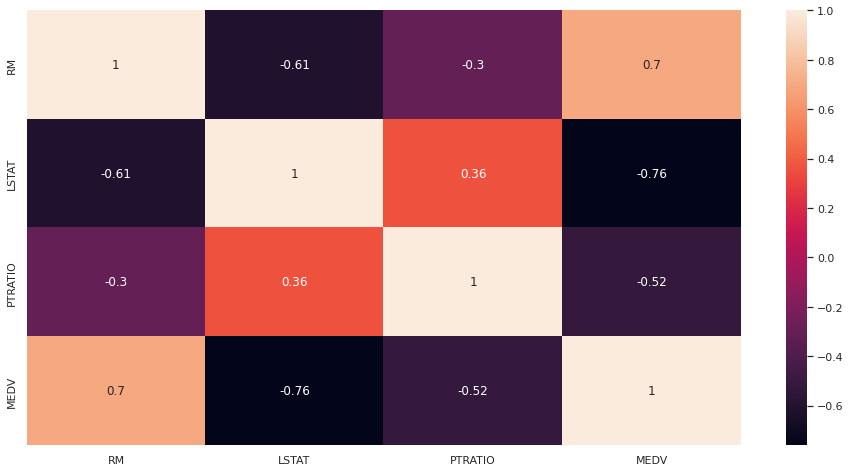

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_house = df.drop('MEDV',axis = 1)
y_house = df['MEDV']



Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_house,y_house,
                                                 train_size = 0.8,
                                                 test_size = 0.2
                                                 )




---


**AQUI COMIENZA LO DE ARBOLES**

---



**Entrenamiento y predicción**

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

In [ ]:
# instanciacion

# a diferencia de los otros, este de regresion
arbol = DecisionTreeRegressor(criterion = 'absolute_error',max_depth=3)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

Mostrar el árbol de decisión resultante

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[1] <= 15.0\\nabsolute_error = 125097.698\\nsamples = 391\\nvalue = 445200.0"] ;\n1 [label="X[0] <= 6.722\\nabsolute_error = 101688.462\\nsamples = 260\\nvalue = 494550.0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 7.81\\nabsolute_error = 53855.556\\nsamples = 189\\nvalue = 468300.0"] ;\n1 -> 2 ;\n3 [label="absolute_error = 40117.241\\nsamples = 58\\nvalue = 509250.0"] ;\n2 -> 3 ;\n4 [label="absolute_error = 46536.641\\nsamples = 131\\nvalue = 438900.0"] ;\n2 -> 4 ;\n5 [label="X[0] <= 7.437\\nabsolute_error = 106330.986\\nsamples = 71\\nvalue = 690900.0"] ;\n1 -> 5 ;\n6 [label="absolute_error = 66283.636\\nsamples = 55\\nvalue = 655200.0"] ;\n5 -> 6 ;\n7 [label="absolute_error = 63000.0\\nsamples = 16\\nvalue = 921900.0"] ;\n5 -> 7 ;\n8 [label="X[1] <= 19.9\\nabsolute_error = 71111.45\\nsamples = 131\\nvalue = 298200.0"] ;\n0 -> 8 [labeldistance

Mostrar la importancia de cada atributo en el árbol resultante

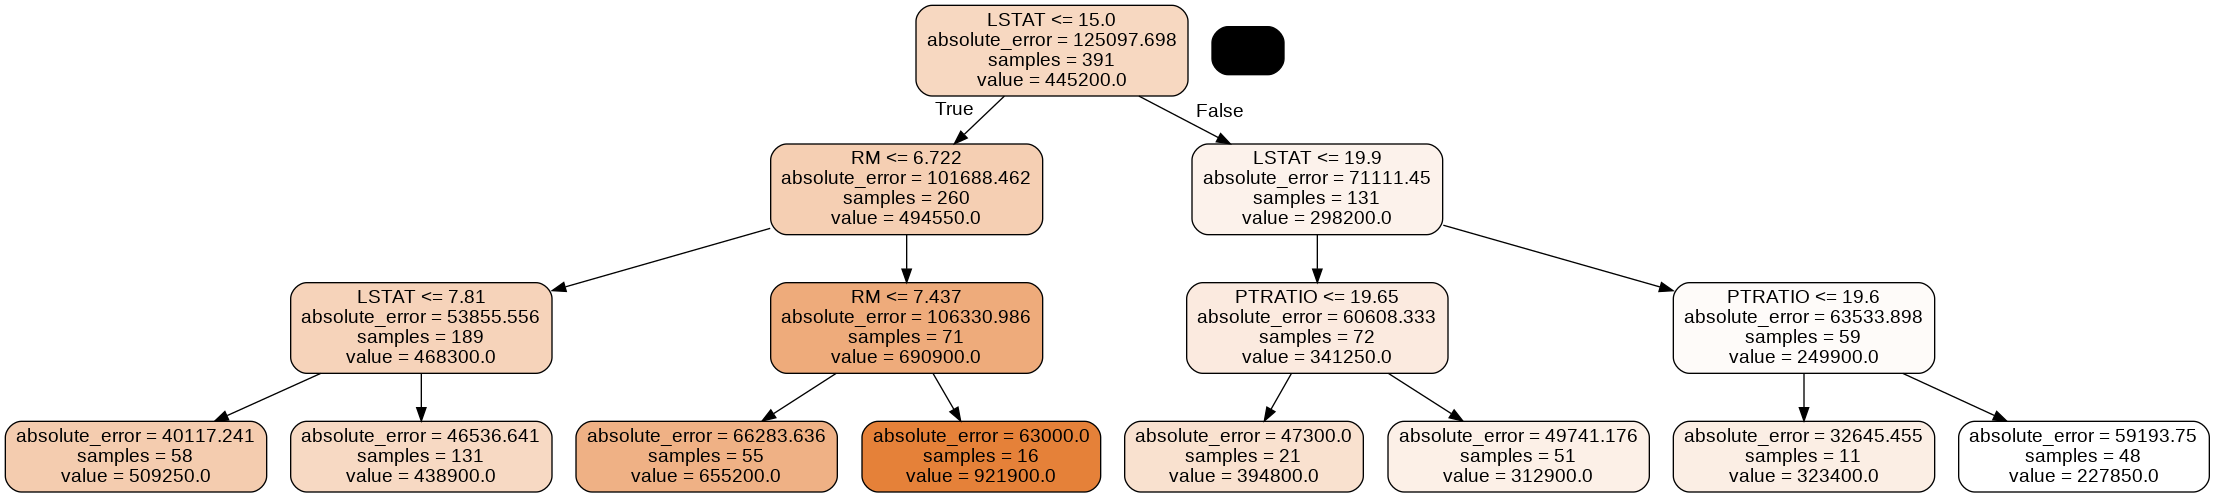

In [ ]:
from pandas._libs.tslibs import dtypes
dot_data = StringIO()

# regresor no tiene

# arbol_classes = []
# arbol_classes
# for i in arbol.classes_:
#   i = str(i)
#   arbol_classes.append(i)

tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


Intenta guardar el modelo de predicción ya entrenado usando dump (https://scikitlearn.org/stable/modules/model_persistence.html)

In [ ]:
dump(arbol, 'arbol.joblib')

['arbol.joblib']

In [ ]:
arbol2 = load('arbol.joblib') 

In [ ]:
arbol2

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

Evaluación

Mostrar el error cuadrático medio (mean_squared_error)
Mostrar el error absoluto medio (mean_absolute_error)

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_predict,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_predict,y_test)
print(f"error absoluto medio: {mean_absolute_error}")




error cuadrático medio: 6086970000.0
error absoluto medio: 56271.42857142857


Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


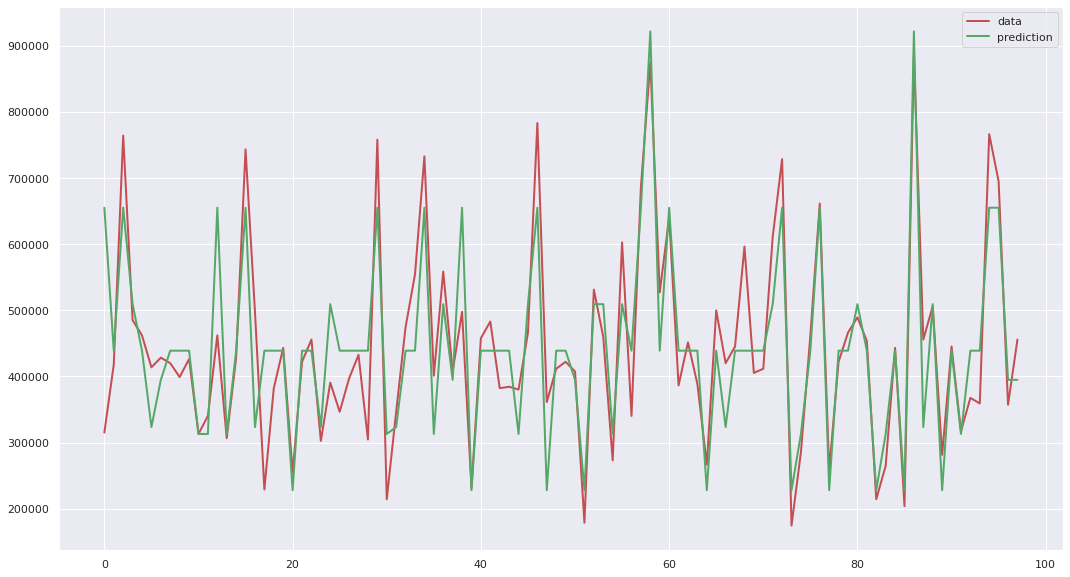

In [ ]:
import numpy as np


xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_predict, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (profundidad de árbol y criterio). Para ello realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad de árbol de 1 a 15.

In [ ]:
# instanciacion

criterions = ['squared_error','friedman_mse','absolute_error','poisson']
errores_absoluto = []
min_depths = 0
min_criterion = ""

for criterion in criterions:
  for max_depth in range(1,16):
    arbol = DecisionTreeRegressor(criterion = criterion,max_depth=max_depth)

    # entrenamiento
    arbol.fit(x_train,y_train)

    # prediccion
    y_predict = arbol.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    mean_absolute_error = mean_absolute_error(y_predict,y_test)

    errores_absoluto.append(mean_absolute_error)

    if min(errores_absoluto) == mean_absolute_error:
      min_criterion = criterion
      min_depths = max_depth

    from sklearn.metrics import mean_absolute_error
    print(f"mean_absolute_error: {mean_absolute_error(y_test,y_predict)} con criterion como: {criterion} y con max_depths como: {max_depth}")

mean_absolute_error: 94091.8140827529 con criterion como: squared_error y con max_depths como: 1
mean_absolute_error: 68543.90728271326 con criterion como: squared_error y con max_depths como: 2
mean_absolute_error: 59807.67258506153 con criterion como: squared_error y con max_depths como: 3
mean_absolute_error: 49845.36839483269 con criterion como: squared_error y con max_depths como: 4
mean_absolute_error: 45891.36445774482 con criterion como: squared_error y con max_depths como: 5
mean_absolute_error: 47043.88082591044 con criterion como: squared_error y con max_depths como: 6
mean_absolute_error: 48971.35196502844 con criterion como: squared_error y con max_depths como: 7
mean_absolute_error: 53523.43529217708 con criterion como: squared_error y con max_depths como: 8
mean_absolute_error: 52725.57604860126 con criterion como: squared_error y con max_depths como: 9
mean_absolute_error: 51962.876082251074 con criterion como: squared_error y con max_depths como: 10
mean_absolute_error

In [ ]:
print(f"El valor min de error absoluto es:{min(errores_absoluto)}, con k={min_criterion}, y w={min_depths}")

El valor min de error absoluto es:45698.507314887676, con k=friedman_mse, y w=5


Finalmente los parámetros elegidos serán los que den mejor media de esas medidas
anteriormente nombradas

In [ ]:
# instanciacion

arbol = DecisionTreeRegressor(criterion = min_criterion,max_depth=min_depths)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

array([625800.        , 430205.26315789, 724920.        , 423952.94117647,
       562990.90909091, 366100.        , 429240.        , 460162.5       ,
       423952.94117647, 430205.26315789, 318750.        , 318750.        ,
       562990.90909091, 318750.        , 430205.26315789, 685020.        ,
       366100.        , 360705.88235294, 430205.26315789, 423952.94117647,
       220650.        , 430205.26315789, 460162.5       , 366100.        ,
       423952.94117647, 495264.        , 423952.94117647, 495264.        ,
       430205.26315789, 685020.        , 360705.88235294, 308175.        ,
       430205.26315789, 495264.        , 700560.        , 318750.        ,
       562990.90909091, 429240.        , 562990.90909091, 220650.        ,
       430205.26315789, 430205.26315789, 423952.94117647, 430205.26315789,
       318750.        , 495264.        , 778050.        , 220650.        ,
       460162.5       , 460162.5       , 394800.        , 220650.        ,
       495264.        , 4

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[1] <= 9.95\\nfriedman_mse = 28367863135.903\\nsamples = 391\\nvalue = 456919.182"] ;\n1 [label="X[0] <= 7.121\\nfriedman_mse = 21810031864.203\\nsamples = 163\\nvalue = 590306.135"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 6.542\\nfriedman_mse = 8940586827.801\\nsamples = 134\\nvalue = 539449.254"] ;\n1 -> 2 ;\n3 [label="X[0] <= 6.053\\nfriedman_mse = 3612058175.676\\nsamples = 74\\nvalue = 484050.0"] ;\n2 -> 3 ;\n4 [label="X[0] <= 4.698\\nfriedman_mse = 3590951388.889\\nsamples = 18\\nvalue = 432483.333"] ;\n3 -> 4 ;\n5 [label="friedman_mse = 0.0\\nsamples = 1\\nvalue = 577500.0"] ;\n4 -> 5 ;\n6 [label="friedman_mse = 2492367197.232\\nsamples = 17\\nvalue = 423952.941"] ;\n4 -> 6 ;\n7 [label="X[1] <= 9.44\\nfriedman_mse = 2489394375.0\\nsamples = 56\\nvalue = 500625.0"] ;\n3 -> 7 ;\n8 [label="friedman_mse = 1322710704.0\\nsamples = 50\\nvalue

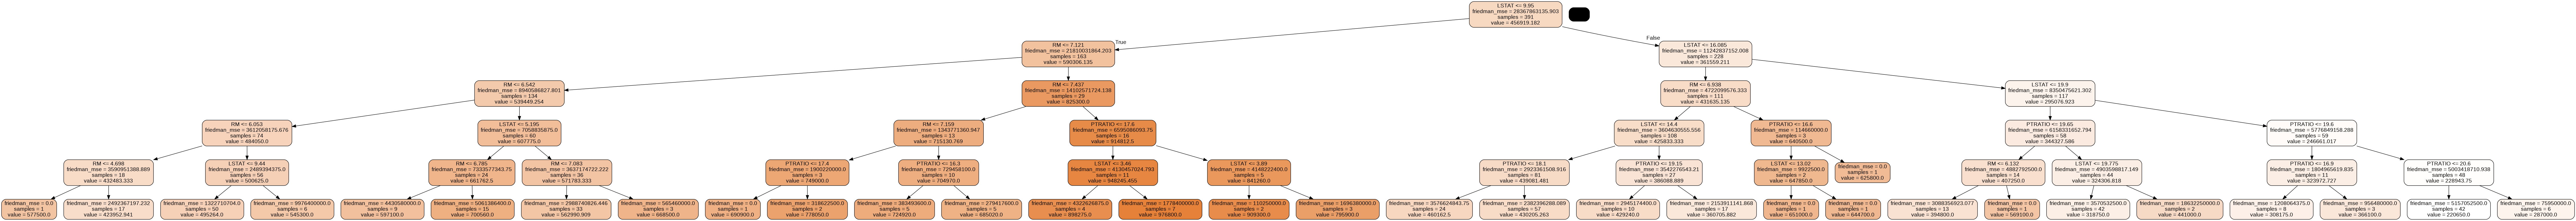

In [ ]:
dot_data = StringIO()

tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar el error cuadrático medio (mean_squared_error) Mostrar el error absoluto medio (mean_absolute_error)

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_predict,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_predict,y_test)
print(f"error absoluto medio: {mean_absolute_error}")



error cuadrático medio: 4023385068.3625135
error absoluto medio: 45698.507314887676


Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


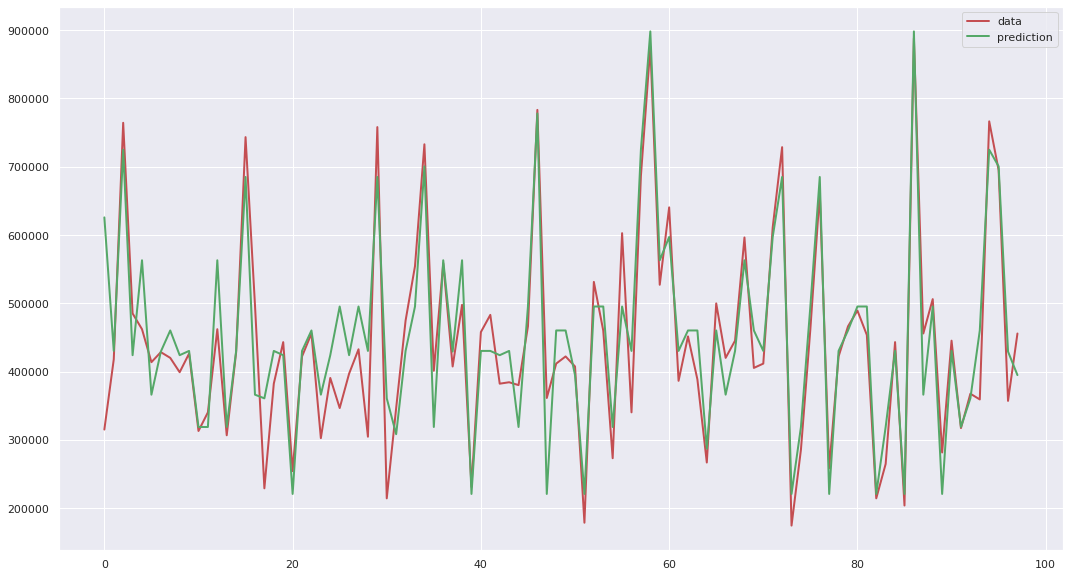

In [ ]:
import numpy as np


xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_predict, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()